C:\Users\azriel\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


(13, 41)


C:\Users\azriel\AppData\Local\Temp\ipykernel_5128\2544981345.py:18: FutureWarning: Pass y=[-6.2978557e-05  4.1614279e-05 -1.5520926e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, n_mfcc=13, sr=sample_rate)


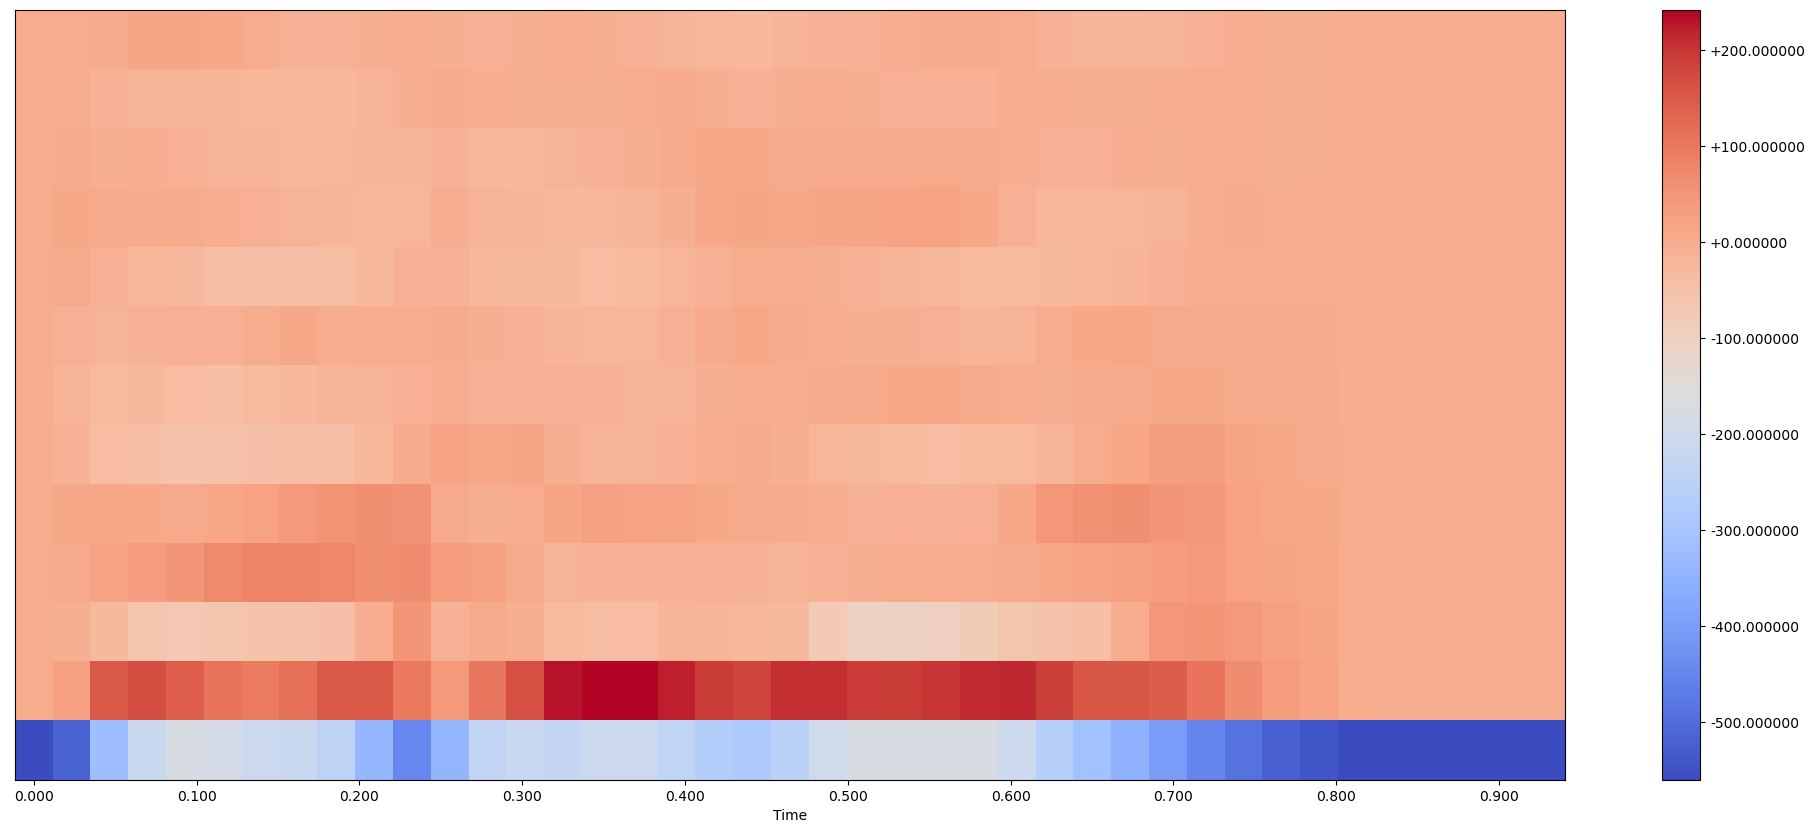

(13, 41)
(13, 41)


(39, 41)

In [2]:
import pyaudio
import torch
import torchaudio
import requests
import pathlib
import wave
# Plot waveform and spectrogram
import matplotlib.pyplot as plt
import os
import librosa
import sklearn
import librosa.display
import numpy as np

signal, sample_rate = librosa.load("Abraham.wav")

#Extract MFCCs
mfccs = librosa.feature.mfcc(signal, n_mfcc=13, sr=sample_rate)
print(mfccs.shape)

# Visualize MFCCs
plt.figure(figsize=(25,10))
librosa.display.specshow(mfccs, x_axis="time", sr=sample_rate)
plt.colorbar(format="%+2f")
plt.show()

#Calculate delta and delta2 MFCCs
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

print(delta_mfccs.shape)
print(delta2_mfccs.shape)

comprehensive_mfccs = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))
comprehensive_mfccs.shape

(13, 173)


C:\Users\azriel\AppData\Local\Temp\ipykernel_5128\1476333272.py:4: FutureWarning: Pass y=[-3.52297297e-06 -9.46231012e-06 -3.39051485e-06 ...  4.31234766e-05
  1.04279505e-04  3.57992249e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccsInput = librosa.feature.mfcc(signal, n_mfcc=13, sr=sample_rate)


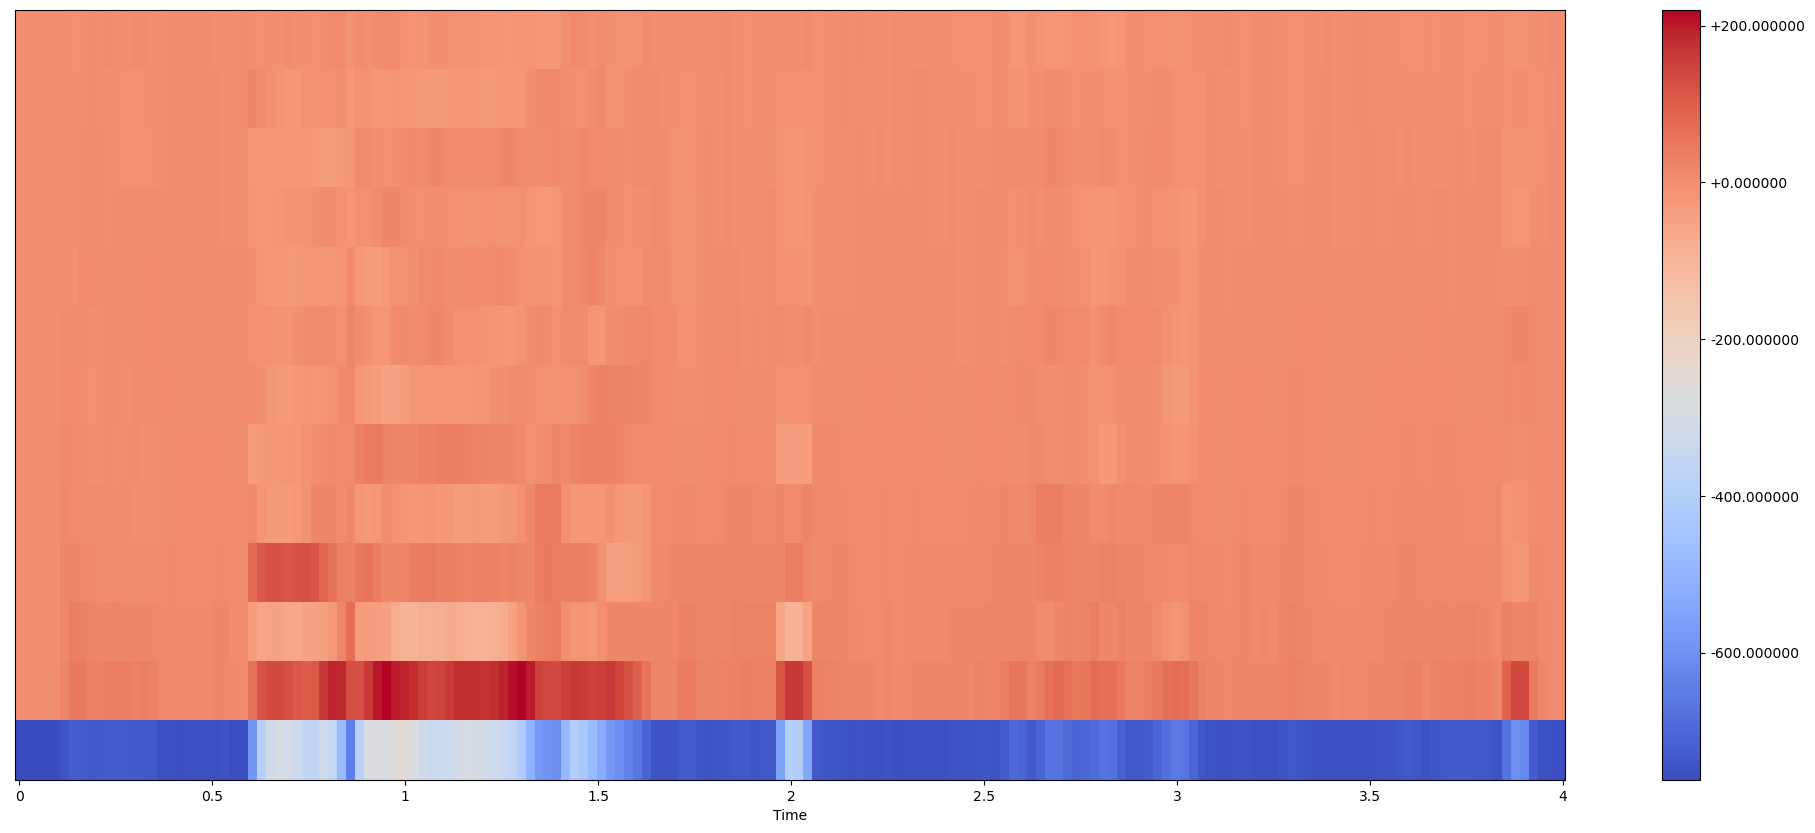

(13, 173)
(13, 173)


(39, 173)

In [5]:
signal, sample_rate = librosa.load("InputAbraham.wav")

#Extract MFCCs
mfccsInput = librosa.feature.mfcc(signal, n_mfcc=13, sr=sample_rate)
print(mfccsInput.shape)

# Visualize MFCCs
plt.figure(figsize=(25,10))
librosa.display.specshow(mfccsInput, x_axis="time", sr=sample_rate)
plt.colorbar(format="%+2f")
plt.show()

#Calculate delta and delta2 MFCCs
delta_mfccsInput = librosa.feature.delta(mfccsInput)
delta2_mfccsInput = librosa.feature.delta(mfccsInput, order=2)

print(delta_mfccsInput.shape)
print(delta2_mfccsInput.shape)

comprehensive_mfccsInput = np.concatenate((mfccsInput, delta_mfccsInput, delta2_mfccsInput))
comprehensive_mfccsInput.shape 

In [29]:
accuracy = []

for i in range(13):
    # j is the individual values of one mfccs input coefficient
    for j in mfccsInput[i]:
        # Compares j to values in mfccs[i] where j is within 10% tolerance to mfccs[i]
        if np.isclose(mfccs[i], j, atol=mfccs[i]*0.10).any():
            accuracy.append('TRUE')
        else:
            accuracy.append('FALSE')

accuracyScore = (accuracy.count('TRUE') / len(accuracy)) * 100
    
print(accuracyScore)

36.99421965317919


In [21]:
print(delta_mfccs)

[[ 4.00234985e+01  4.00234985e+01  4.00234985e+01  4.00234985e+01
   4.00234985e+01  1.48967600e+01 -1.78168831e+01 -2.82284832e+01
  -2.19933453e+01 -1.11581583e+01 -8.83109808e-01  9.03988266e+00
   1.84741974e+01  2.32877064e+01  1.81787510e+01  1.98893487e+00
  -6.29306507e+00 -3.51589417e+00  1.66429925e+00  5.49726009e+00
   9.84514999e+00  1.36002693e+01  1.24443254e+01  4.30971527e+00
  -8.04939842e+00 -2.01838169e+01 -2.98162823e+01 -3.72352219e+01
  -4.27644424e+01 -4.52930145e+01 -4.32012024e+01 -3.84291611e+01
  -3.27221184e+01 -2.60551300e+01 -1.86425323e+01 -1.21846361e+01
  -7.01316309e+00 -7.01316309e+00 -7.01316309e+00 -7.01316309e+00
  -7.01316309e+00]
 [ 1.14575472e+01  1.14575472e+01  1.14575472e+01  1.14575472e+01
   1.14575472e+01  5.94815493e+00 -3.23525310e+00 -7.87263489e+00
  -4.90606260e+00  1.05322313e+00  8.18432999e+00  1.28905964e+01
   1.66124382e+01  2.01638584e+01  2.05729885e+01  1.57535419e+01
   5.81009007e+00 -1.50855887e+00 -6.14923239e+00 -6.0496

In [22]:
print(delta_mfccsInput)

[[ 4.805322    4.805322    4.805322   ... -6.37607    -6.37607
  -6.37607   ]
 [ 5.999223    5.999223    5.999223   ... -6.2133503  -6.2133503
  -6.2133503 ]
 [ 4.1810613   4.1810613   4.1810613  ... -1.3256055  -1.3256055
  -1.3256055 ]
 ...
 [ 0.51031935  0.51031935  0.51031935 ...  0.2572755   0.2572755
   0.2572755 ]
 [ 0.16252677  0.16252677  0.16252677 ...  0.27647313  0.27647313
   0.27647313]
 [-0.04905653 -0.04905653 -0.04905653 ...  0.65451956  0.65451956
   0.65451956]]


In [24]:
accuracy = []

for i in range(13):
    # j is the individual values of one mfccs input coefficient
    for j in delta_mfccsInput[i]:
        # Compares j to values in delta_mfccs[i] where j is within 10% tolerance to delta_mfccs[i]
        if np.isclose(delta_mfccs[i], j, atol=delta_mfccs[i]*0.10).any():
            accuracy.append('TRUE')
        else:
            accuracy.append('FALSE')

accuracyScore = (accuracy.count('TRUE') / len(accuracy)) * 100
    
print(accuracyScore)

20.409070698088037


In [30]:
accuracy = []

for i in range(13):
    # j is the individual values of one mfccs input coefficient
    for j in delta2_mfccsInput[i]:
        # Compares j to values in delta2_mfccs[i] where j is within 10% tolerance to delta2_mfccs[i]
        if np.isclose(delta2_mfccs[i], j, atol=delta2_mfccs[i]*0.10).any():
            accuracy.append('TRUE')
        else:
            accuracy.append('FALSE')

accuracyScore = (accuracy.count('TRUE') / len(accuracy)) * 100
    
print(accuracyScore)

21.787461093819473
